In [1]:
import numpy as np
import pandas as pd

encode_fantom_df = pd.DataFrame.from_csv('/Users/manuel/development/thesis/overlap/filtered_hg19DNase_H3K27ac_FANTOM_overlapped.csv', sep="\t")
encode_fantom_df.reset_index(level=0, inplace=True)

In [2]:
encode_fantom_df.T

,0,1,2,3,4,5,6,7,8,9,...,1801771,1801772,1801773,1801774,1801775,1801776,1801777,1801778,1801779,1801780
chrom,chr3,chr1,chr15,chr5,chr11,chr5,chr10,chr10,chr3,chr8,...,chr16,chr1,chr6,chr19,chr7,chr18,chr1,chr5,chr6,chr17
start,152855118,214611302,101260386,52654619,9586536,148864272,3892558,5624645,5062817,126230865,...,58528640,60138160,105771787,8428130,24613000,20807015,150485494,178450920,155442359,37309960
end,152861069,214622352,101269291,52660930,9592486,148869801,3895911,5628826,5068862,126234434,...,58529655,60139325,105773337,8429430,24613150,20808529,150486475,178451070,155443585,37310110
name,ENCODE.3.ENCFF778PVS.0,ENCODE.3.ENCFF778PVS.1,ENCODE.3.ENCFF778PVS.2,ENCODE.3.ENCFF778PVS.3,ENCODE.3.ENCFF778PVS.4,ENCODE.3.ENCFF778PVS.5,ENCODE.3.ENCFF778PVS.6,ENCODE.3.ENCFF778PVS.7,ENCODE.3.ENCFF778PVS.8,ENCODE.3.ENCFF778PVS.9,...,ENCODE.3.ENCFF026HMJ.33999,ENCODE.3.ENCFF026HMJ.34000,ENCODE.3.ENCFF026HMJ.34001,ENCODE.3.ENCFF026HMJ.34002,ENCODE.3.ENCFF026HMJ.34003,ENCODE.3.ENCFF026HMJ.34004,ENCODE.3.ENCFF026HMJ.34005,ENCODE.3.ENCFF026HMJ.34006,ENCODE.3.ENCFF026HMJ.34007,ENCODE.3.ENCFF026HMJ.34008
score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
strand,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
size,5951,11050,8905,6311,5950,5529,3353,4181,6045,3569,...,1015,1165,1550,1300,150,1514,981,150,1226,150
method,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,...,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac
description,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...
assembly,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,...,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19


In [3]:
encode_fantom_df[['FA_size', 'FA_ovlp_len', 'FA_ovlp_pct']].describe()

,FA_size,FA_ovlp_len,FA_ovlp_pct
count,1.801781e+06,1.801781e+06,1.801781e+06
mean,4.735484e+01,3.952389e+01,4.582093e+00
std,1.477957e+02,1.292502e+02,1.652188e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,2.860000e+03,2.860000e+03,1.000000e+02


In [4]:
# filter only valid overlaps
df = encode_fantom_df.query("FA_ovlp_pct > 0")

In [5]:
print("Valid overlaps:", len(df), "on", len(encode_fantom_df), " Ratio:", len(df)/len(encode_fantom_df)) 

Valid overlaps: 212041 on 1801781  Ratio: 0.11768411366309224


In [6]:
df[['FA_size', 'FA_ovlp_len', 'FA_ovlp_pct']].describe()

,FA_size,FA_ovlp_len,FA_ovlp_pct
count,212041.000000,212041.000000,212041.000000
mean,402.389387,335.847327,38.935524
std,206.760548,205.994536,31.336400
min,15.000000,15.000000,10.000000
25%,273.000000,150.000000,15.332266
50%,368.000000,309.000000,24.464061
75%,474.000000,426.000000,52.891566
max,2860.000000,2860.000000,100.000000


In [7]:
df.corr()

,start,end,score,size,FA_start,FA_end,FA_score,FA_size,FA_ovlp_len,FA_ovlp_pct
start,1.000000,1.000000,NaN,0.012405,1.000000,1.000000,0.004837,0.004097,0.009359,-0.007741
end,1.000000,1.000000,NaN,0.012427,1.000000,1.000000,0.004840,0.004105,0.009374,-0.007756
score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,0.012405,0.012427,NaN,1.000000,0.012415,0.012417,0.134370,0.365432,0.656276,-0.669150
FA_start,1.000000,1.000000,NaN,0.012415,1.000000,1.000000,0.004837,0.004099,0.009365,-0.007749
FA_end,1.000000,1.000000,NaN,0.012417,1.000000,1.000000,0.004839,0.004103,0.009368,-0.007748
FA_score,0.004837,0.004840,NaN,0.134370,0.004837,0.004839,1.000000,0.379368,0.312687,0.036999
FA_size,0.004097,0.004105,NaN,0.365432,0.004099,0.004103,0.379368,1.000000,0.764330,0.103771
FA_ovlp_len,0.009359,0.009374,NaN,0.656276,0.009365,0.009368,0.312687,0.764330,1.000000,-0.295263
FA_ovlp_pct,-0.007741,-0.007756,NaN,-0.669150,-0.007749,-0.007748,0.036999,0.103771,-0.295263,1.000000


In [8]:
df_ovlp = df[['FA_ovlp_len', 'FA_ovlp_pct']]

/Users/manuel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


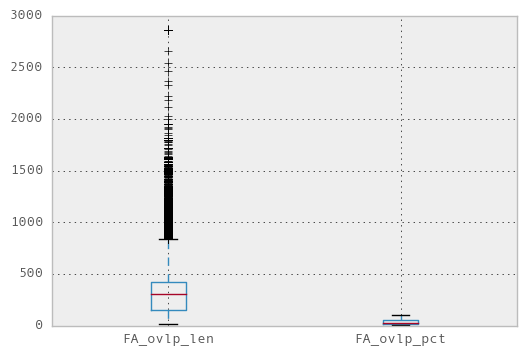

In [9]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default' # Sets the plotting display theme to ggplot2
plt.show(df_ovlp.plot(kind = 'box'))

/Users/manuel/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


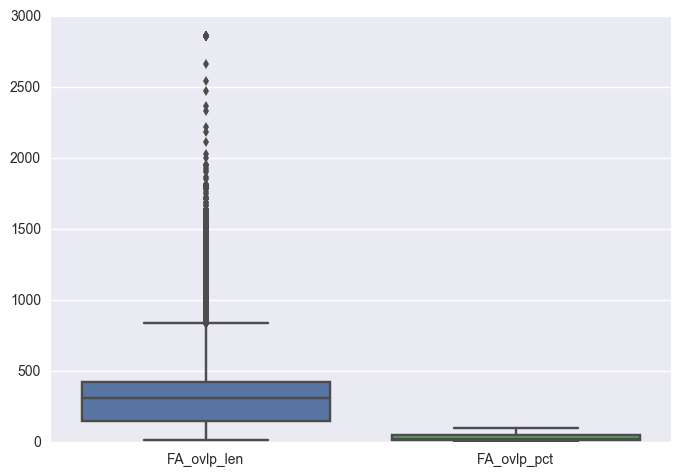

In [10]:
# Import the seaborn library
import seaborn as sns

# Do the boxplot
plt.show(sns.boxplot(df_ovlp))

In [11]:
encode_fantom_df.columns[0:16]

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims'],
      dtype='object')

In [38]:
# extract encode only data
df_encode_only = encode_fantom_df[['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_encode_only = df_encode_only.drop_duplicates(subset='name')

df_encode_only.T

,0,1,2,3,4,5,6,7,8,9,...,1801771,1801772,1801773,1801774,1801775,1801776,1801777,1801778,1801779,1801780
chrom,chr3,chr1,chr15,chr5,chr11,chr5,chr10,chr10,chr3,chr8,...,chr16,chr1,chr6,chr19,chr7,chr18,chr1,chr5,chr6,chr17
start,152855118,214611302,101260386,52654619,9586536,148864272,3892558,5624645,5062817,126230865,...,58528640,60138160,105771787,8428130,24613000,20807015,150485494,178450920,155442359,37309960
end,152861069,214622352,101269291,52660930,9592486,148869801,3895911,5628826,5068862,126234434,...,58529655,60139325,105773337,8429430,24613150,20808529,150486475,178451070,155443585,37310110
name,ENCODE.3.ENCFF778PVS.0,ENCODE.3.ENCFF778PVS.1,ENCODE.3.ENCFF778PVS.2,ENCODE.3.ENCFF778PVS.3,ENCODE.3.ENCFF778PVS.4,ENCODE.3.ENCFF778PVS.5,ENCODE.3.ENCFF778PVS.6,ENCODE.3.ENCFF778PVS.7,ENCODE.3.ENCFF778PVS.8,ENCODE.3.ENCFF778PVS.9,...,ENCODE.3.ENCFF026HMJ.33999,ENCODE.3.ENCFF026HMJ.34000,ENCODE.3.ENCFF026HMJ.34001,ENCODE.3.ENCFF026HMJ.34002,ENCODE.3.ENCFF026HMJ.34003,ENCODE.3.ENCFF026HMJ.34004,ENCODE.3.ENCFF026HMJ.34005,ENCODE.3.ENCFF026HMJ.34006,ENCODE.3.ENCFF026HMJ.34007,ENCODE.3.ENCFF026HMJ.34008
score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
strand,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
size,5951,11050,8905,6311,5950,5529,3353,4181,6045,3569,...,1015,1165,1550,1300,150,1514,981,150,1226,150
method,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,...,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac
description,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...
assembly,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,...,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19


In [61]:
df_encode_only[['biosample_type', 'biosample_term_name', 'size']].groupby(['biosample_type', 'biosample_term_name']).agg(['mean', 'count'])

size  \
                                                                                    mean   
biosample_type                     biosample_term_name                                     
immortalized cell line             GM12878                                   1438.693603   
                                   HCT116                                     902.016401   
                                   HeLa-S3                                   1774.904315   
                                   HepG2                                     1382.624615   
                                   K562                                      1198.229849   
                                   MCF-7                                      656.594641   
                                   Panc1                                     1542.574274   
in vitro differentiated cells      mesenchymal stem cell                     1093.750324   
                                   mesendoderm                               1232.427527   
                                   myotube                                   1975.936164   
induced pluripotent stem cell line iPS DF 19.11                               719.244243   
                                   iPS DF 6.9                                 297.177590   
primary cell                       B cell                                    1186.026403   
                                   CD14-positive monocyte                    1182.241397   
                                   IMR-90                                    1709.433985   
                                   T-cell                                    1439.534273   
                                   astrocyte                                 1880.022577   
                                   common myeloid progenitor, CD34-positive  1396.564064   
                                   endothelial cell of umbilical vein        1706.773870   
                                   fibroblast of dermis                      1120.012899   
                                   fibroblast of lung                        1408.926736   
                                   foreskin fibroblast                       1491.468119   
                                   foreskin melanocyte                        575.255923   
                                   keratinocyte                              1924.942176   
                                   mammary epithelial cell                   1637.380951   
                                   natural killer cell                       1364.689730   
                                   skeletal muscle myoblast                  1617.188852   
                                   trophoblast cell                          1295.317072   
stem cell                          H1-hESC                                    701.688252   
                                   H9                                         508.000071   
                                   neuronal stem cell                         531.558355   
tissue                             adrenal gland                             2041.979215   
                                   female gonad                               972.856764   
                                   large intestine                           2117.187024   
                                   muscle of leg                             1885.973494   
                                   muscle of trunk                           1456.215860   
                                   pancreas                                   831.016190   
                                   placenta                                  1879.675949   
                                   psoas muscle                              1140.177574   
                                   small intestine                           1752.870213   
                                   stomach                                   1410.306691   
                                   t

In [53]:
encode_fantom_df.columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia', 'FA_chrom', 'FA_start', 'FA_end',
       'FA_name', 'FA_score', 'FA_size', 'FA_method', 'FA_ovlp_len',
       'FA_ovlp_pct', 'FA_encyclopedia'],
      dtype='object')

In [60]:
# extract fantom only data
df_fantom_only = encode_fantom_df[['biosample_type', 'biosample_term_name', 'FA_chrom', 'FA_start', 'FA_end',
       'FA_name', 'FA_score', 'FA_size', 'FA_method', 'FA_encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_fantom_only = df_fantom_only.query("FA_name != '.'")
df_fantom_only = df_fantom_only.drop_duplicates(subset='FA_name')

df_fantom_only.T

,6,8,9,10,13,16,22,26,36,37,...,1798099,1798100,1798253,1798779,1799259,1799375,1800056,1801022,1801197,1801335
biosample_type,primary cell,primary cell,primary cell,primary cell,primary cell,primary cell,primary cell,primary cell,primary cell,primary cell,...,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells,in vitro differentiated cells
biosample_term_name,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,mammary epithelial cell,...,myotube,myotube,myotube,myotube,myotube,myotube,myotube,myotube,myotube,myotube
FA_chrom,chr10,chr3,chr8,chr8,chr11,chr10,chr6,chr1,chr1,chr1,...,chr6,chr6,chr12,chr5,chr16,chr1,chr2,chr1,chr1,chr9
FA_start,3893365,5067974,126231490,126232175,94480491,3848037,159273925,145113904,235133014,235134086,...,45390987,45391331,54384983,126985914,4290474,192846727,114014908,95009926,149984633,136856624
FA_end,3894190,5068590,126231859,126232753,94481212,3849536,159274893,145114998,235133422,235134438,...,45391259,45391628,54385161,126986221,4290907,192846972,114015299,95010072,149984917,136856782
FA_name,FANTOM.5.PERMISSIVE.3965,FANTOM.5.PERMISSIVE.26422,FANTOM.5.PERMISSIVE.39851,FANTOM.5.PERMISSIVE.39852,FANTOM.5.PERMISSIVE.7393,FANTOM.5.PERMISSIVE.3954,FANTOM.5.PERMISSIVE.35853,FANTOM.5.PERMISSIVE.1955,FANTOM.5.PERMISSIVE.3671,FANTOM.5.PERMISSIVE.3672,...,FANTOM.5.PERMISSIVE.34470,FANTOM.5.PERMISSIVE.34471,FANTOM.5.PERMISSIVE.8904,FANTOM.5.PERMISSIVE.32327,FANTOM.5.PERMISSIVE.14224,FANTOM.5.PERMISSIVE.2767,FANTOM.5.PERMISSIVE.21712,FANTOM.5.PERMISSIVE.1560,FANTOM.5.PERMISSIVE.1984,FANTOM.5.PERMISSIVE.41972
FA_score,693,256,140,291,13,339,807,2794,135,45,...,113,93,3,2,13,51,3,4,8,19
FA_size,825,616,369,578,721,1499,968,1094,408,352,...,272,297,178,307,433,245,391,146,284,158
FA_method,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,...,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs,CAGE_TCs
FA_encyclopedia,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,...,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM,FANTOM


In [13]:
df_encode_only.describe()

,start,end,score,size
count,1.785580e+06,1.785580e+06,1785580.0,1.785580e+06
mean,7.477412e+07,7.477543e+07,1.0,1.312961e+03
std,5.497006e+07,5.497009e+07,0.0,1.489315e+03
min,5.840000e+03,6.742000e+03,1.0,1.500000e+02
25%,3.210305e+07,3.210403e+07,1.0,1.500000e+02
50%,6.249251e+07,6.249402e+07,1.0,1.038000e+03
75%,1.107071e+08,1.107081e+08,1.0,1.815000e+03
max,2.492398e+08,2.492404e+08,1.0,9.282900e+04


In [110]:
df_fantom_only[['biosample_type', 'biosample_term_name', 'FA_size']].groupby(
    ['biosample_type', 'biosample_term_name']).agg(['mean', 'std', 'count'])

FA_size  \
                                                                                   mean   
biosample_type                     biosample_term_name                                    
immortalized cell line             GM12878                                   326.239334   
                                   HCT116                                    230.500000   
                                   HeLa-S3                                   313.442336   
                                   HepG2                                     275.327586   
                                   K562                                      273.887728   
                                   MCF-7                                     234.782258   
                                   Panc1                                     274.545455   
in vitro differentiated cells      mesenchymal stem cell                     299.590319   
                                   mesendoderm                               283.777778   
                                   myotube                                   259.294118   
induced pluripotent stem cell line iPS DF 19.11                              267.673152   
                                   iPS DF 6.9                                200.437500   
primary cell                       B cell                                    243.388393   
                                   CD14-positive monocyte                    292.219323   
                                   IMR-90                                    287.406061   
                                   T-cell                                    257.931579   
                                   astrocyte                                 322.200680   
                                   common myeloid progenitor, CD34-positive  338.368305   
                                   endothelial cell of umbilical vein        256.694915   
                                   fibroblast of dermis                      282.640506   
                                   fibroblast of lung                        231.364341   
                                   foreskin fibroblast                       310.402284   
                                   foreskin melanocyte                       260.917476   
                                   keratinocyte                              297.230435   
                                   mammary epithelial cell                   407.842749   
                                   natural killer cell                       312.106352   
                                   skeletal muscle myoblast                  298.150000   
                                   trophoblast cell                          325.989848   
stem cell                          H1-hESC                                   266.948031   
                                   H9                                        218.841463   
                                   neuronal stem cell                        271.879545   
tissue                             adrenal gland                             325.270833   
                                   female gonad                              297.812135   
                                   large intestine                           276.918182   
                                   muscle of leg                             272.271186   
                                   muscle of trunk                           285.725490   
                                   pancreas                                  262.507576   
                                   placenta                                  385.818698   
                                   psoas muscle                              332.742668   
                                   small intestine                           306.698113   
                                   stomach                                   259.951899   
                                   thymus                                   

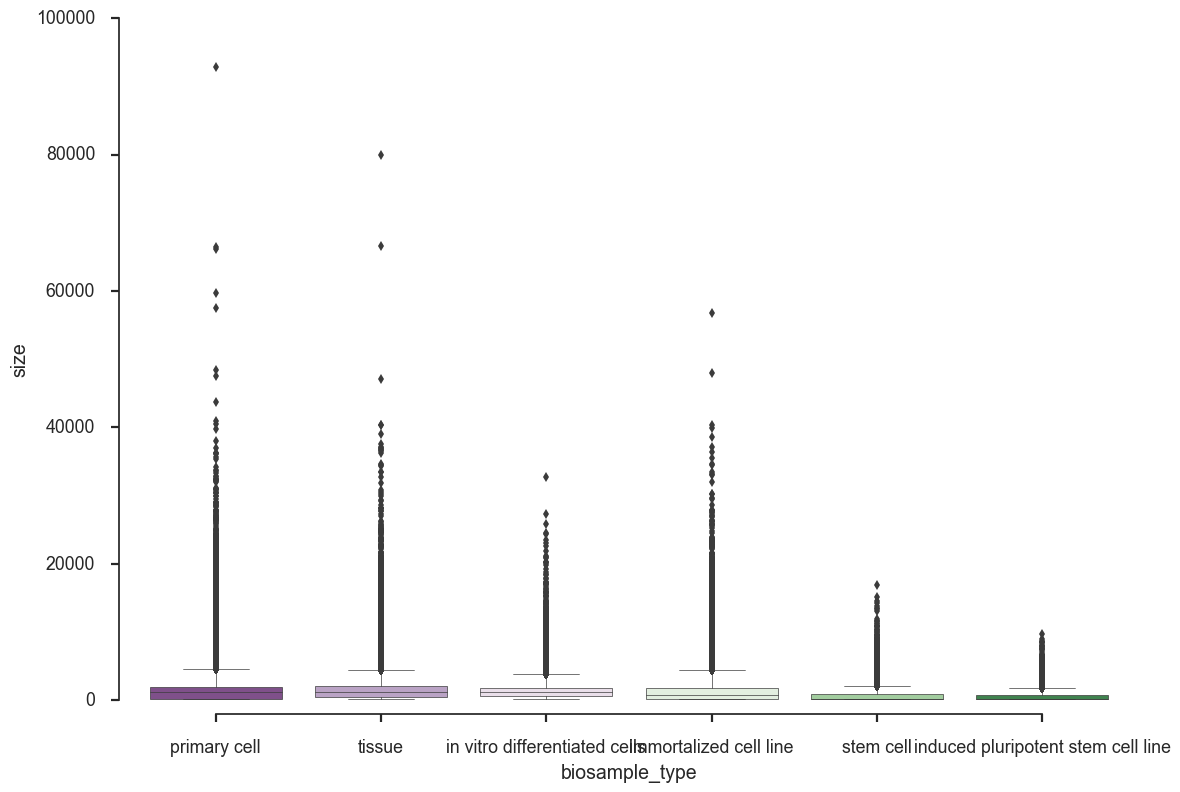

In [79]:
plot = sns.boxplot(x="biosample_type", y="size", data=df_encode_only, palette="PRGn")
#plot.set_ybound(upper=5000)
#plot.set_xticklabels(labels=df_encode_only['biosample_type'].unique())
#for item in plot.get_xticklabels():
#    item.set_rotation(90)
#plot.set_yscale("log")
sns.despine(offset=10, trim=True)

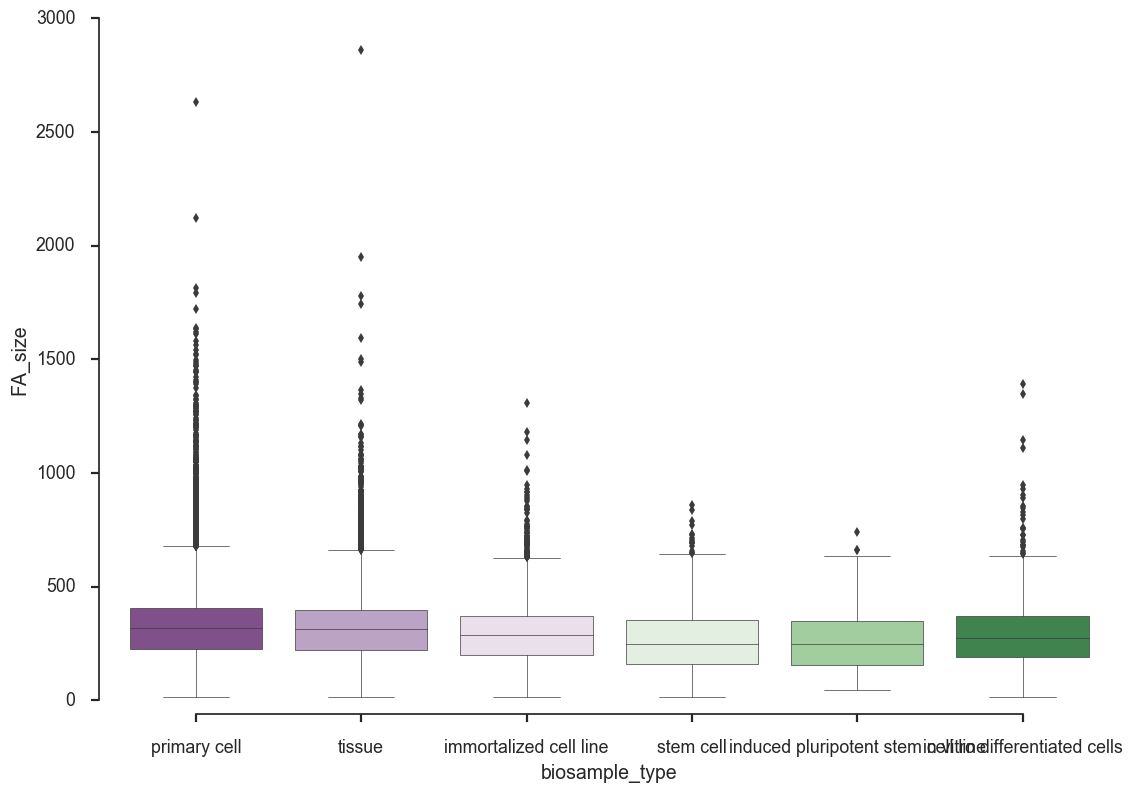

In [78]:
plot = sns.boxplot(x="biosample_type", y="FA_size", data=df_fantom_only, palette="PRGn")
#plot.set_ybound(upper=5000)
#plot.set_xticklabels(labels=df_encode_only['biosample_type'].unique())
#for item in plot.get_xticklabels():
#    item.set_rotation(90)
#plot.set_yscale("log")
sns.despine(offset=10, trim=True)

In [15]:
df_encode_only.sort_values(by='chrom', inplace=True)

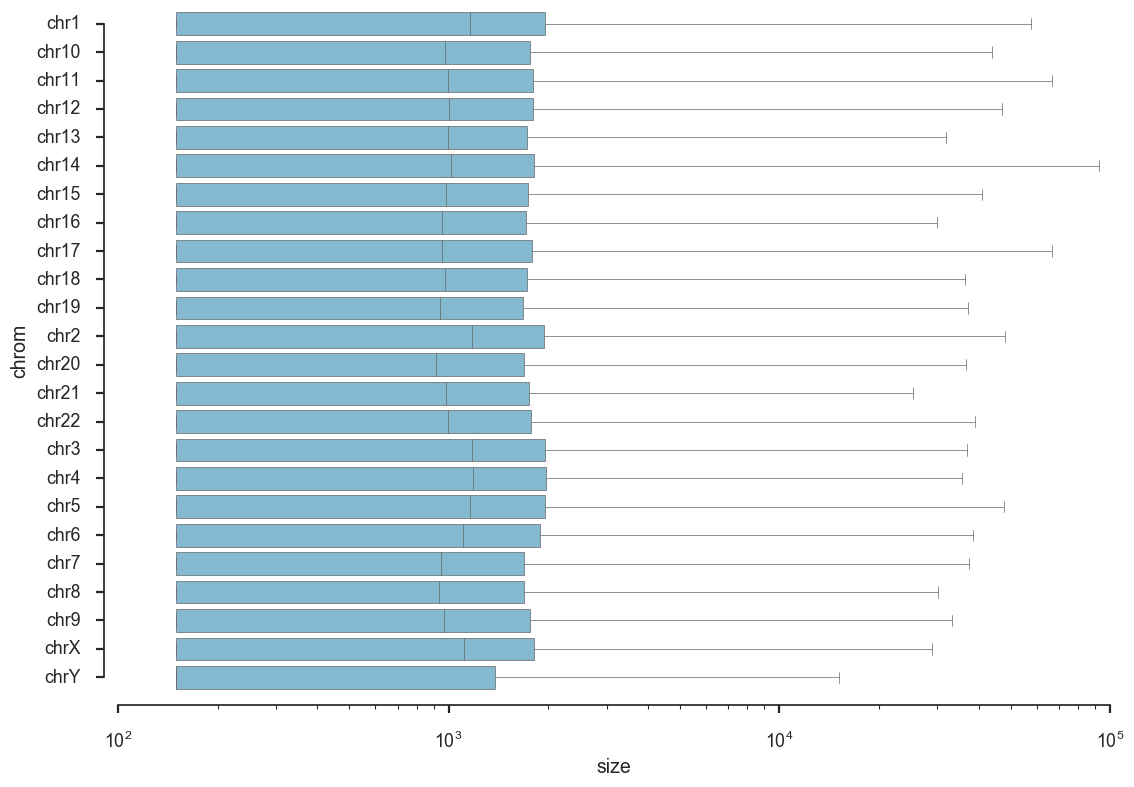

In [16]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="size", y="chrom", data=df_encode_only,
                 whis=np.inf, color="c")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [ ]:
df_encode_only.sort_values(by='biosample_term_name', inplace=True)

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2056: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2057: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2070: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2077: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


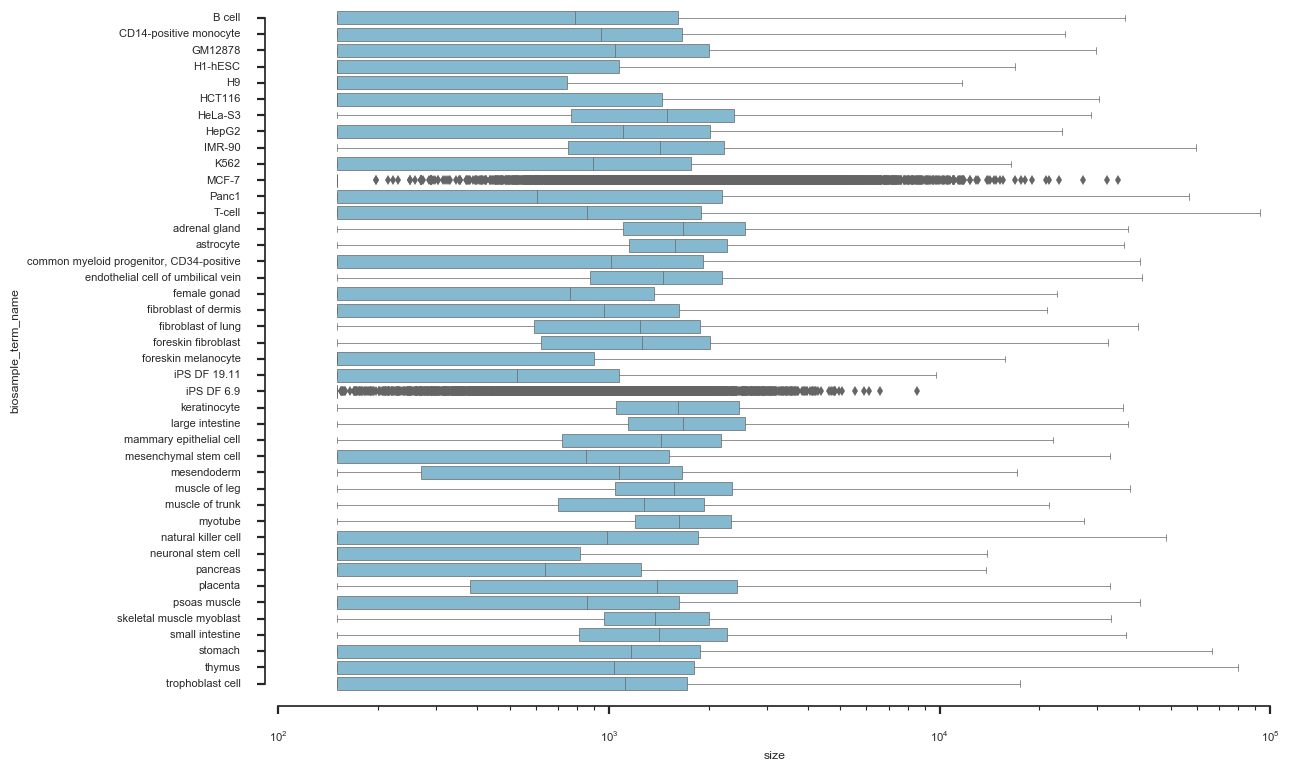

In [18]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="size", y="biosample_term_name", data=df_encode_only,
                 whis=np.inf, color="c")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [70]:
df_fantom_only.sort_values(by='FA_chrom', inplace=True)

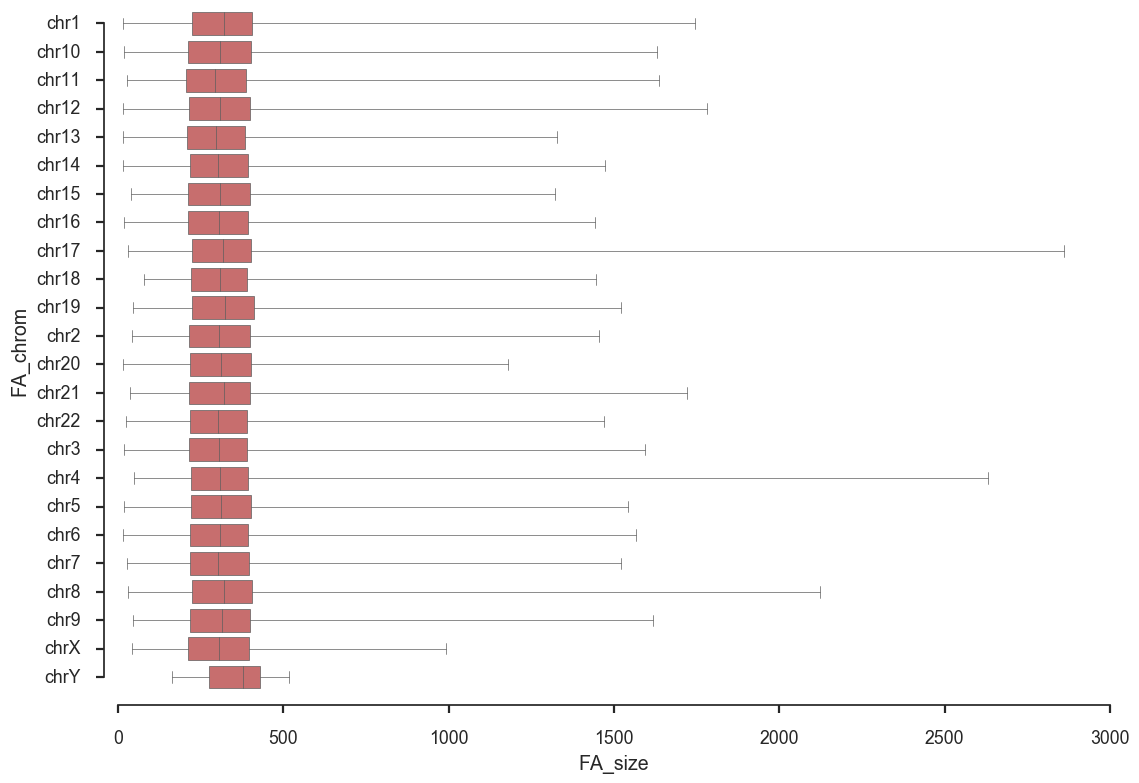

In [72]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="FA_size", y="FA_chrom", data=df_fantom_only,
                 whis=np.inf, color="r")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
#ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [65]:
df_fantom_only.sort_values(by='biosample_term_name', inplace=True)

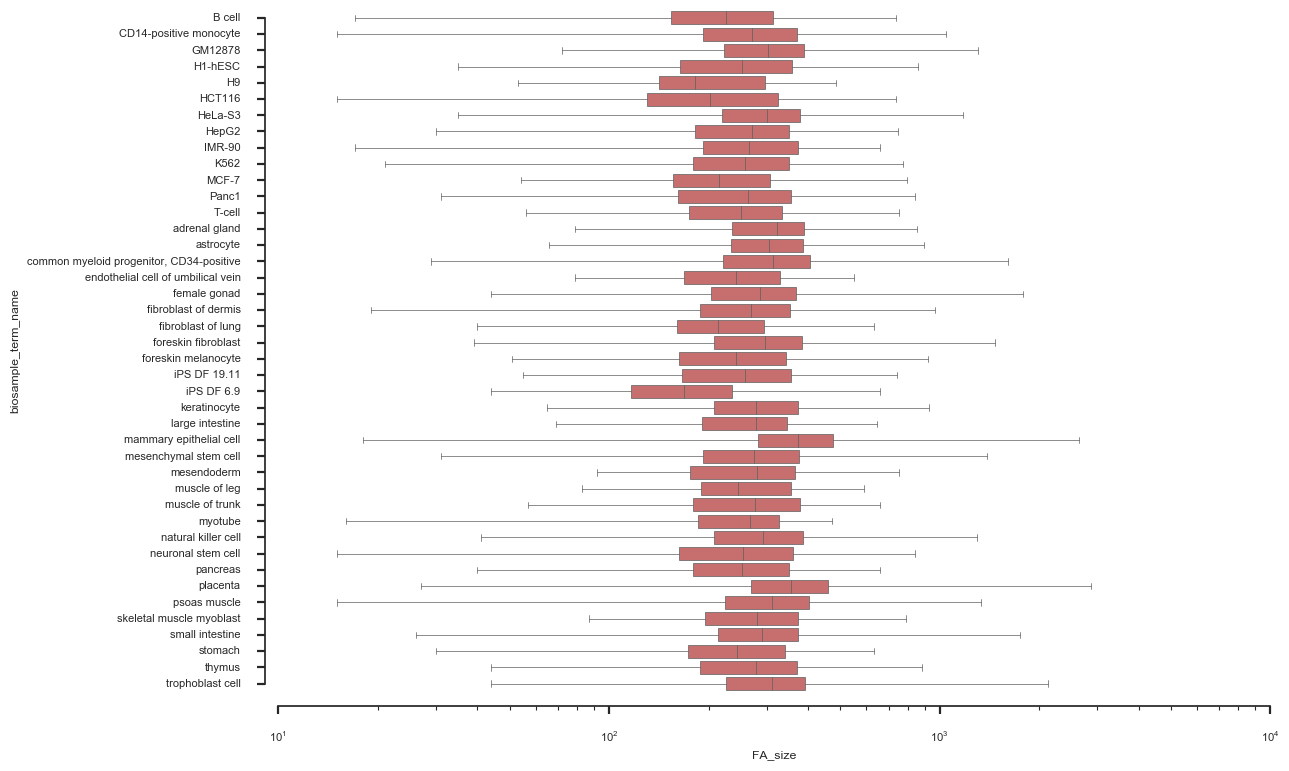

In [68]:
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="FA_size", y="biosample_term_name", data=df_fantom_only,
                 whis=np.inf, color="r")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

In [83]:
overlaps_only_df = encode_fantom_df.query("FA_name != '.'")

In [87]:
len(encode_fantom_df)

1801781

In [86]:
len(overlaps_only_df)

212041

In [116]:
overlaps_only_df[['biosample_type', 'biosample_term_name', 'FA_ovlp_pct', 'FA_score']].groupby(
    ['biosample_type', 'biosample_term_name']).agg(['mean', 'std', 'count'])

FA_ovlp_pct  \
                                                                                   mean   
biosample_type                     biosample_term_name                                    
immortalized cell line             GM12878                                    40.869524   
                                   HCT116                                     54.623761   
                                   HeLa-S3                                    29.395563   
                                   HepG2                                      43.241331   
                                   K562                                       42.625706   
                                   MCF-7                                      65.394066   
                                   Panc1                                      48.510403   
in vitro differentiated cells      mesenchymal stem cell                      43.737903   
                                   mesendoderm                                36.838360   
                                   myotube                                    23.970027   
induced pluripotent stem cell line iPS DF 19.11                               48.536299   
                                   iPS DF 6.9                                 71.093788   
primary cell                       B cell                                     41.065726   
                                   CD14-positive monocyte                     47.760575   
                                   IMR-90                                     35.315110   
                                   T-cell                                     35.783622   
                                   astrocyte                                  25.051362   
                                   common myeloid progenitor, CD34-positive   43.887727   
                                   endothelial cell of umbilical vein         27.823480   
                                   fibroblast of dermis                       39.154385   
                                   fibroblast of lung                         32.399206   
                                   foreskin fibroblast                        35.406764   
                                   foreskin melanocyte                        61.788831   
                                   keratinocyte                               26.853061   
                                   mammary epithelial cell                    30.021350   
                                   natural killer cell                        44.340546   
                                   skeletal muscle myoblast                   29.730055   
                                   trophoblast cell                           34.805758   
stem cell                          H1-hESC                                    56.039443   
                                   H9                                         55.782470   
                                   neuronal stem cell                         57.346574   
tissue                             adrenal gland                              24.092500   
                                   female gonad                               43.772437   
                                   large intestine                            24.090990   
                                   muscle of leg                              24.068121   
                                   muscle of trunk                            30.203667   
                                   pancreas                                   53.609018   
                                   placenta                                   29.416951   
                                   psoas muscle                               51.415829   
                                   small intestine                            27.246610   
                                   stomach                                    35.297446   
                                   thymus                               

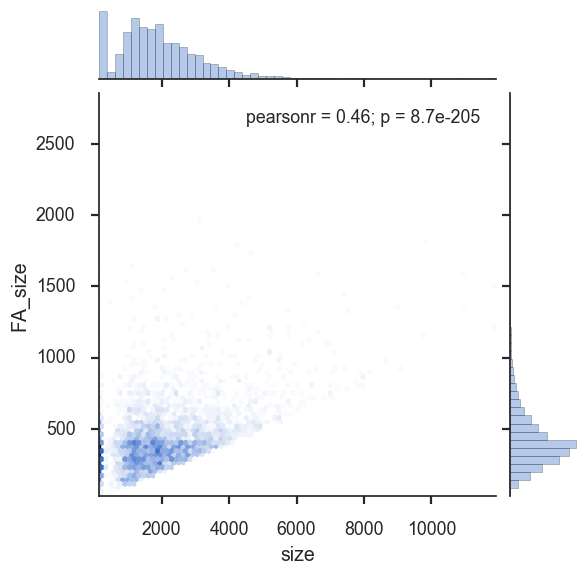

In [113]:
sample_df = encode_fantom_df.query('biosample_term_name == "placenta" & FA_ovlp_pct > 0')
sns.jointplot(x="size", y="FA_size", data=sample_df, kind='hex')

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


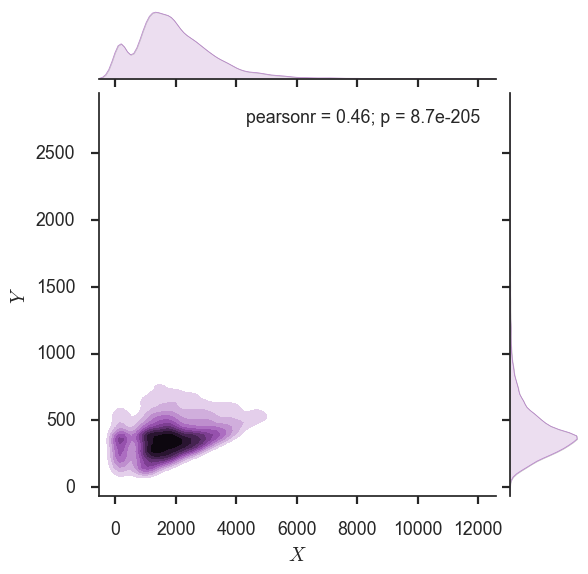

In [115]:
g = sns.jointplot(x="size", y="FA_size", data=sample_df, kind="kde", color="m")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


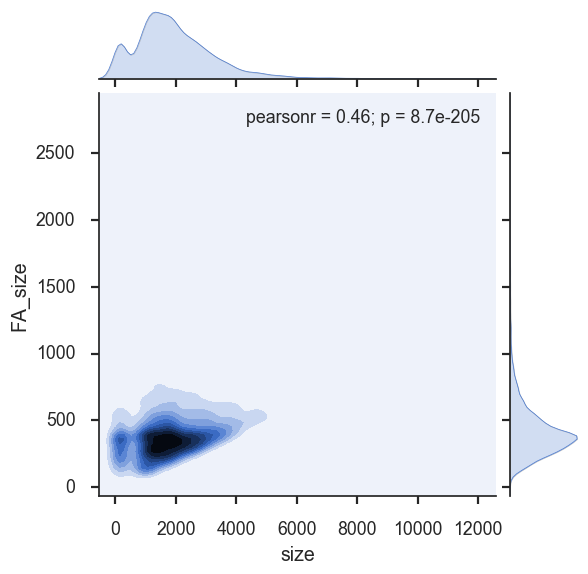

In [111]:
sns.jointplot(x="size", y="FA_size", data=sample_df, kind="kde");

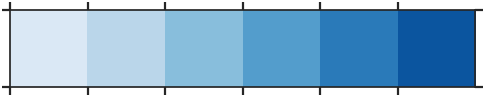

In [19]:
sns.palplot(sns.color_palette("Blues"))

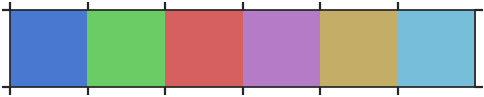

In [20]:
sns.palplot(sns.color_palette("muted"))

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


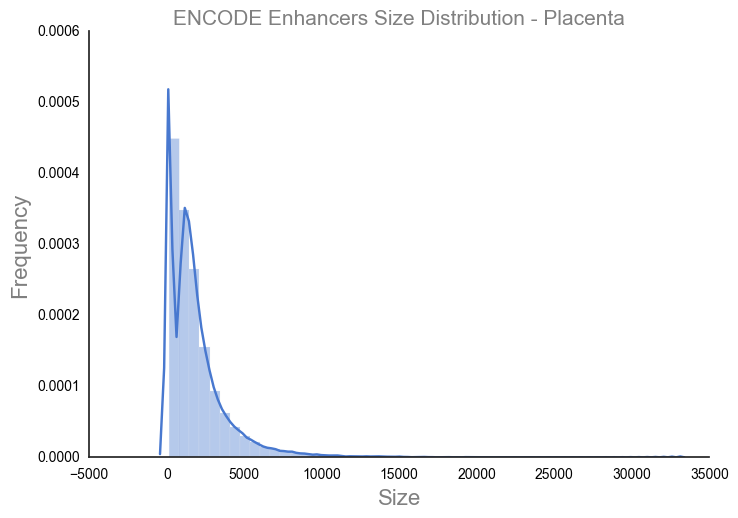

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=True, color="b")
g.axes.set_title('ENCODE Enhancers Size Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Size",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

In [22]:
df_encode_only = encode_fantom_df[['chrom', 'start', 'end', 'name', 'score', 'strand', 'size', 'method',
       'description', 'assembly', 'biosample_type', 'biosample_term_id',
       'biosample_term_name', 'developmental_slims', 'system_slims',
       'organ_slims', 'encyclopedia']]
#df_encode_only.reset_index(level=0, inplace=True)
df_encode_only = df_encode_only.drop_duplicates(subset='name')
df_fantom_only = encode_fantom_df.drop_duplicates(subset='name')

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


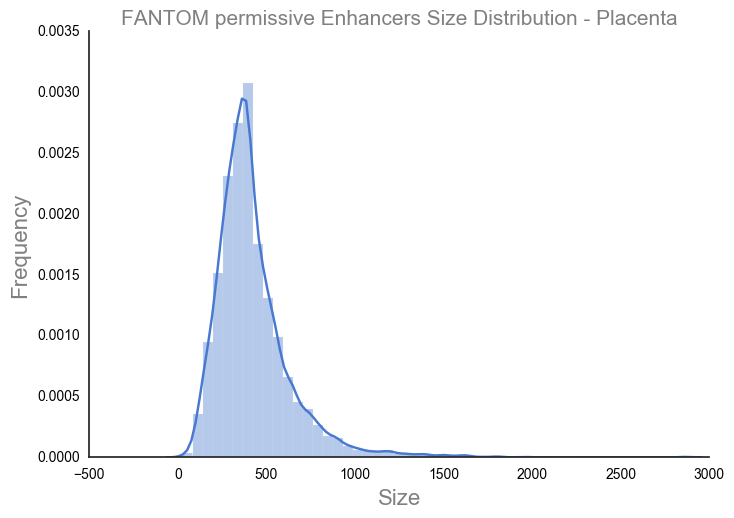

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = encode_fantom_df.query('biosample_term_name == "placenta" & FA_size > 0')[['FA_size']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=True, color="b")
g.axes.set_title('FANTOM permissive Enhancers Size Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Size",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

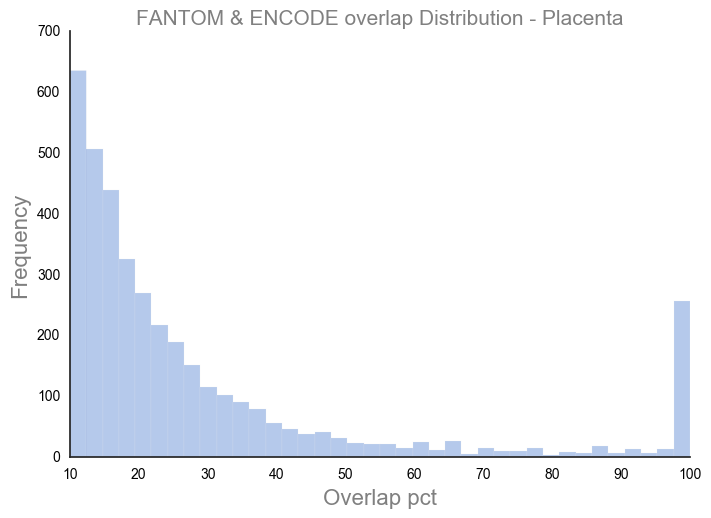

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

d = encode_fantom_df.query('biosample_term_name == "placenta" & FA_size > 0')[['FA_ovlp_pct']]
#d = df_encode_only.query('size > 0')[['size']]

# Plot a simple histogram with binsize determined automatically
g = sns.distplot(d, kde=False, color="b")

g.axes.set_title('FANTOM & ENCODE overlap Distribution - Placenta', fontsize=15,color="black",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Overlap pct",size = 16,color="black",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Frequency",size = 16,color="black",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=10,labelcolor="black")
#ax.set_xscale("log")
sns.despine(offset=0,trim=True)

In [24]:
data = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
data.describe()

,size
count,38389.000000
mean,1879.675949
std,2038.726097
min,150.000000
25%,380.000000
50%,1397.000000
75%,2439.000000
max,32806.000000


In [25]:
np.logspace(0,100, 1000)

array([  1.00000000e+000,   1.25921561e+000,   1.58562396e+000,
         1.99664245e+000,   2.51420335e+000,   3.16592411e+000,
         3.98658107e+000,   5.01996513e+000,   6.32121848e+000,
         7.95977700e+000,   1.00230755e+001,   1.26212131e+001,
         1.58928287e+001,   2.00124980e+001,   2.52000499e+001,
         3.17322963e+001,   3.99578030e+001,   5.03154895e+001,
         6.33580499e+001,   7.97814457e+001,   1.00462042e+002,
         1.26503372e+002,   1.59295021e+002,   2.00586778e+002,
         2.52582003e+002,   3.18055202e+002,   4.00500076e+002,
         5.04315949e+002,   6.35042517e+002,   7.99655453e+002,
         1.00693863e+003,   1.26795285e+003,   1.59662602e+003,
         2.01049642e+003,   2.53164848e+003,   3.18789129e+003,
         4.01424249e+003,   5.05479682e+003,   6.36507908e+003,
         8.01500696e+003,   1.00926219e+004,   1.27087871e+004,
         1.60031031e+004,   2.01513573e+004,   2.53749038e+004,
         3.19524751e+004,   4.02350555e+

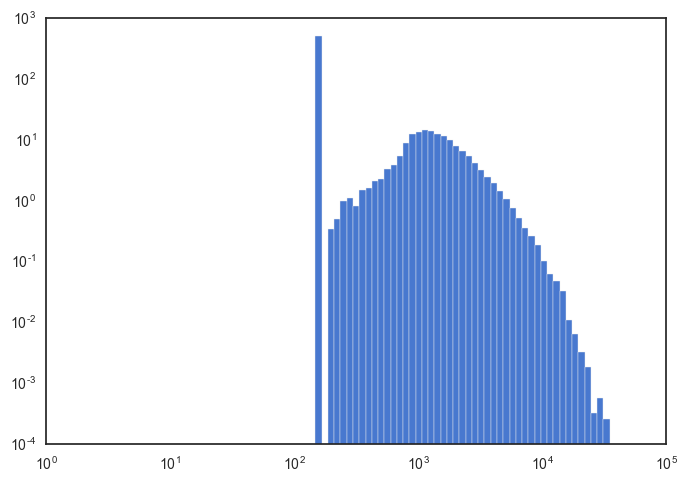

In [26]:
import numpy as np
from matplotlib import pyplot as plt

# something random to plot
#data = (np.random.random(10000)*10)**3
data = df_encode_only.query('biosample_term_name == "placenta" & size > 0')[['size']]
# log-scaled bins
bins = np.logspace(0, 5, 100)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

In [27]:
encode_fantom_df.describe()

,start,end,score,size,FA_start,FA_end,FA_score,FA_size,FA_ovlp_len,FA_ovlp_pct
count,1.801781e+06,1.801781e+06,1801781.0,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06
mean,7.480117e+07,7.480249e+07,1.0,1.321550e+03,8.959037e+06,8.959085e+06,1.660282e+01,4.735484e+01,3.952389e+01,4.582093e+00
std,5.501282e+07,5.501285e+07,0.0,1.489428e+03,3.147939e+07,3.147950e+07,1.450117e+02,1.477957e+02,1.292502e+02,1.652188e+01
min,5.840000e+03,6.742000e+03,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.211176e+07,3.211347e+07,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.250488e+07,6.250626e+07,1.0,1.048000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.107457e+08,1.107458e+08,1.0,1.828000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.492398e+08,2.492404e+08,1.0,9.282900e+04,2.491573e+08,2.491577e+08,8.368000e+03,2.860000e+03,2.860000e+03,1.000000e+02


In [28]:
encode_fantom_df.describe()

,start,end,score,size,FA_start,FA_end,FA_score,FA_size,FA_ovlp_len,FA_ovlp_pct
count,1.801781e+06,1.801781e+06,1801781.0,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06,1.801781e+06
mean,7.480117e+07,7.480249e+07,1.0,1.321550e+03,8.959037e+06,8.959085e+06,1.660282e+01,4.735484e+01,3.952389e+01,4.582093e+00
std,5.501282e+07,5.501285e+07,0.0,1.489428e+03,3.147939e+07,3.147950e+07,1.450117e+02,1.477957e+02,1.292502e+02,1.652188e+01
min,5.840000e+03,6.742000e+03,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.211176e+07,3.211347e+07,1.0,1.500000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.250488e+07,6.250626e+07,1.0,1.048000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.107457e+08,1.107458e+08,1.0,1.828000e+03,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.492398e+08,2.492404e+08,1.0,9.282900e+04,2.491573e+08,2.491577e+08,8.368000e+03,2.860000e+03,2.860000e+03,1.000000e+02


In [131]:
#grouped = encode_fantom_df[['FA_name', 'biosample_term_name']].groupby(['FA_name']).agg(['count'])
encode_fantom_df_ovlp = encode_fantom_df.query("FA_name != '.' & FA_score > 50")
pivot = pd.pivot_table(encode_fantom_df_ovlp,index=["biosample_term_name"], values=["name"], columns=["chrom"],aggfunc=[len])

encode_fantom_df_scores = encode_fantom_df.query("FA_name != '.'")
pivot_scores = pd.pivot_table(encode_fantom_df_scores,
                              index=["biosample_term_name"], 
                              values=["FA_score"], columns=["chrom"],aggfunc=[np.mean])

pivot_ovlp_sizes = pd.pivot_table(encode_fantom_df_scores,
                              index=["biosample_term_name"], 
                              values=["FA_ovlp_pct"], columns=["chrom"],aggfunc=[np.mean])

In [132]:
encode_fantom_df_ovlp.size

2405079

In [133]:
pivot = pivot.fillna(0)
pivot_scores = pivot_scores.fillna(0)
pivot_ovlp_sizes = pivot_ovlp_sizes.fillna(0)

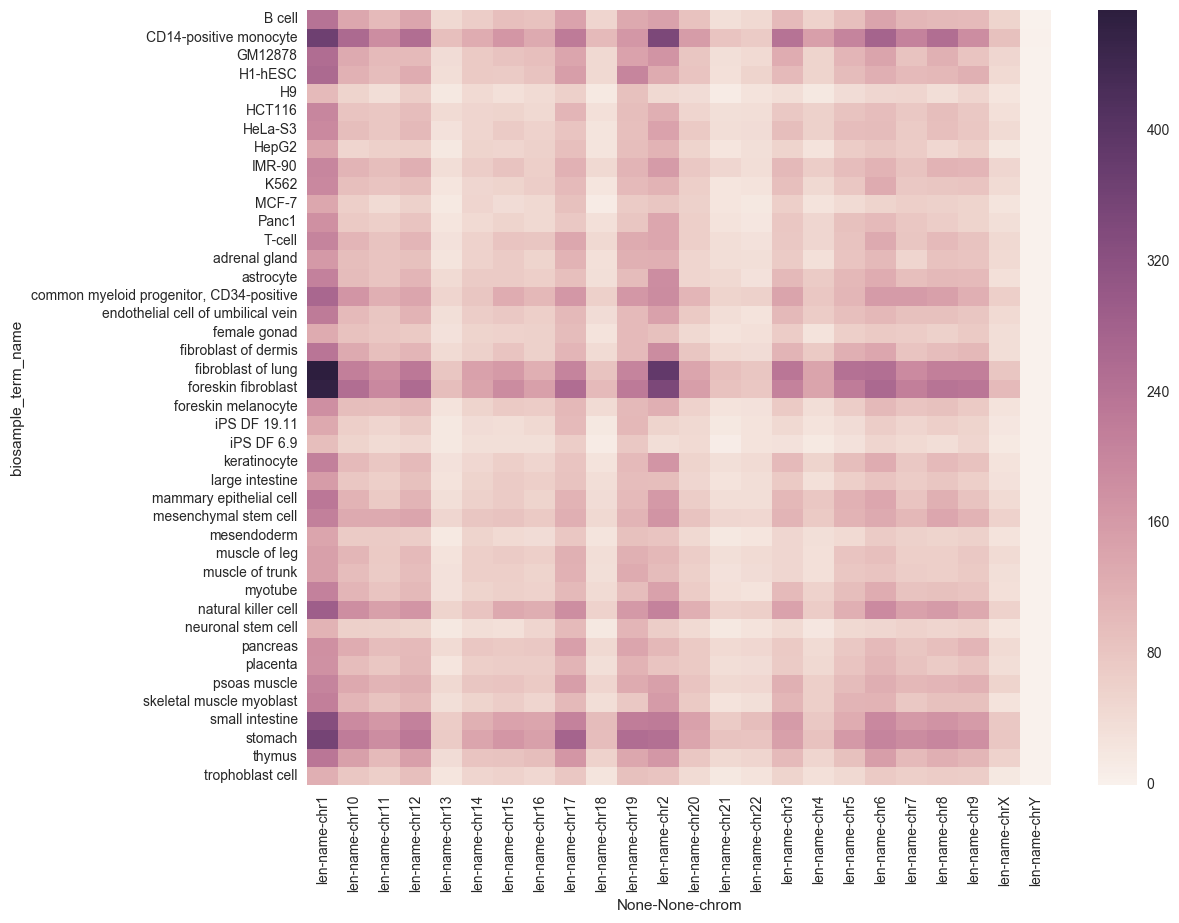

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot, annot=False, linewidths=0, ax=ax)


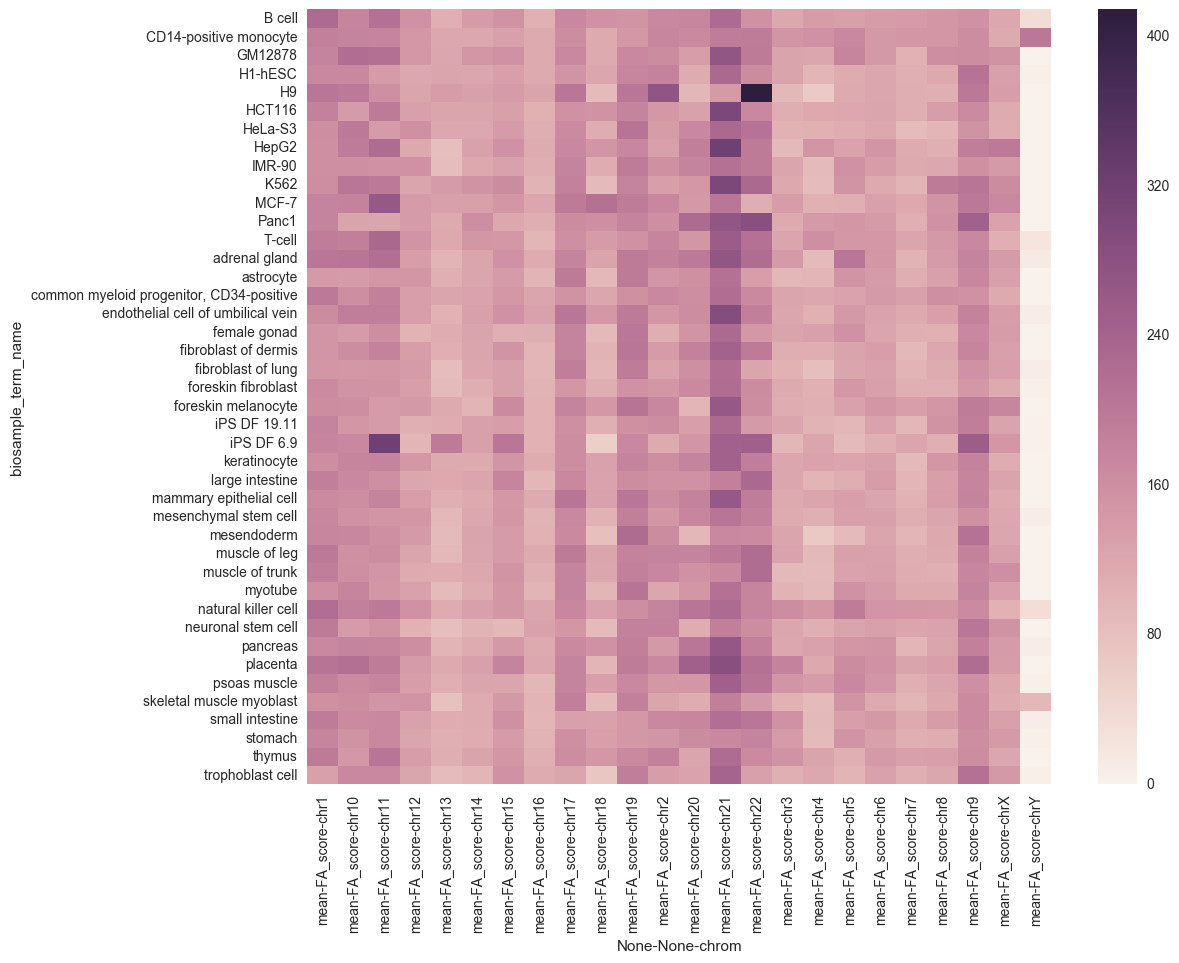

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_scores, annot=False, linewidths=0, ax=ax)

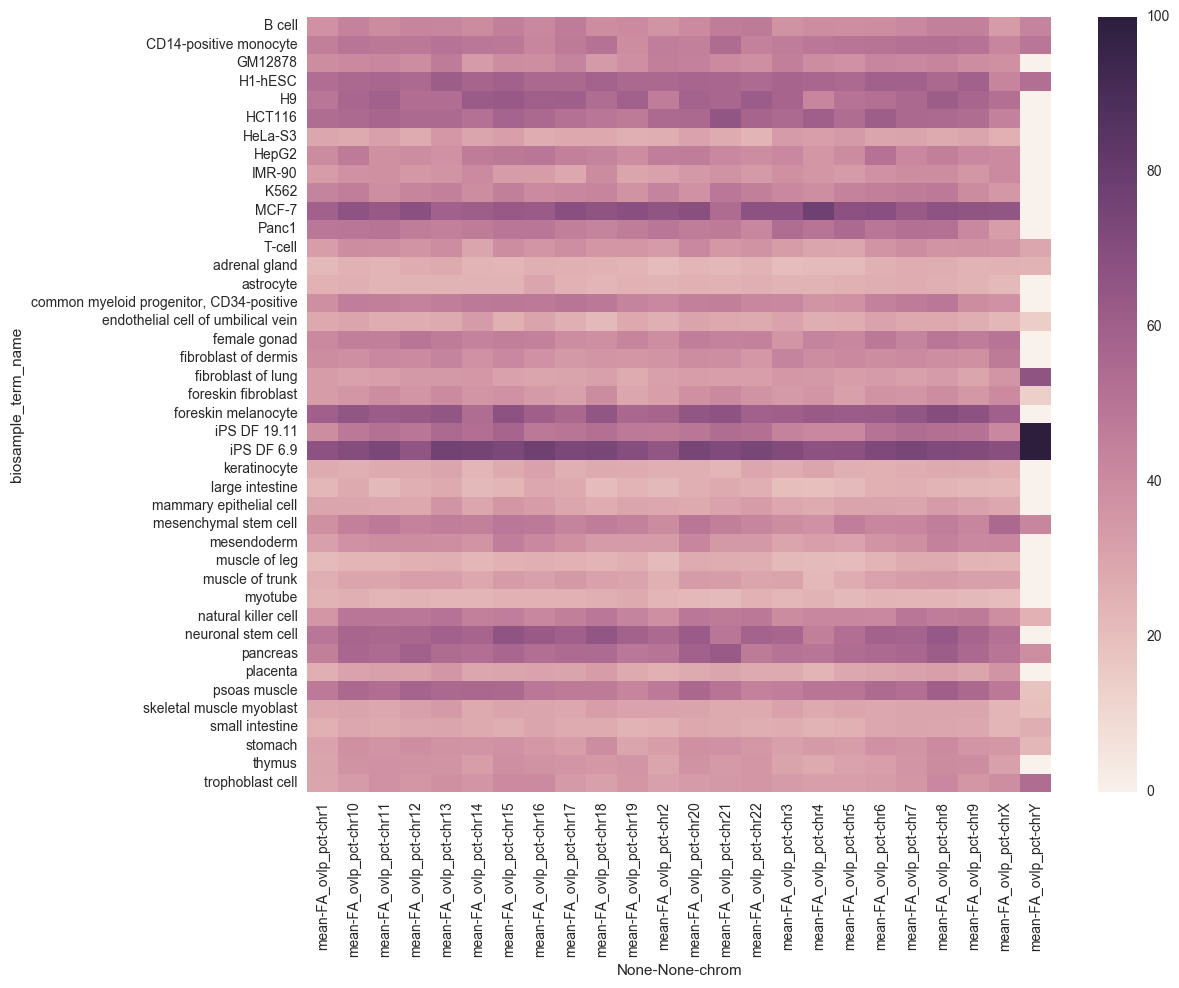

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_ovlp_sizes, annot=False, linewidths=0, ax=ax)

In [35]:
encode_fantom_df.T

,0,1,2,3,4,5,6,7,8,9,...,1801771,1801772,1801773,1801774,1801775,1801776,1801777,1801778,1801779,1801780
chrom,chr3,chr1,chr15,chr5,chr11,chr5,chr10,chr10,chr3,chr8,...,chr16,chr1,chr6,chr19,chr7,chr18,chr1,chr5,chr6,chr17
start,152855118,214611302,101260386,52654619,9586536,148864272,3892558,5624645,5062817,126230865,...,58528640,60138160,105771787,8428130,24613000,20807015,150485494,178450920,155442359,37309960
end,152861069,214622352,101269291,52660930,9592486,148869801,3895911,5628826,5068862,126234434,...,58529655,60139325,105773337,8429430,24613150,20808529,150486475,178451070,155443585,37310110
name,ENCODE.3.ENCFF778PVS.0,ENCODE.3.ENCFF778PVS.1,ENCODE.3.ENCFF778PVS.2,ENCODE.3.ENCFF778PVS.3,ENCODE.3.ENCFF778PVS.4,ENCODE.3.ENCFF778PVS.5,ENCODE.3.ENCFF778PVS.6,ENCODE.3.ENCFF778PVS.7,ENCODE.3.ENCFF778PVS.8,ENCODE.3.ENCFF778PVS.9,...,ENCODE.3.ENCFF026HMJ.33999,ENCODE.3.ENCFF026HMJ.34000,ENCODE.3.ENCFF026HMJ.34001,ENCODE.3.ENCFF026HMJ.34002,ENCODE.3.ENCFF026HMJ.34003,ENCODE.3.ENCFF026HMJ.34004,ENCODE.3.ENCFF026HMJ.34005,ENCODE.3.ENCFF026HMJ.34006,ENCODE.3.ENCFF026HMJ.34007,ENCODE.3.ENCFF026HMJ.34008
score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
strand,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
size,5951,11050,8905,6311,5950,5529,3353,4181,6045,3569,...,1015,1165,1550,1300,150,1514,981,150,1226,150
method,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,...,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac,DNase_H3K27ac
description,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...,Enhancer-like regions using DNase and H3K27ac ...
assembly,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,...,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19,hg19


In [3]:
encode_fantom_df_tissue = encode_fantom_df.query("biosample_type == 'tissue' & FA_name != '.' & FA_score > 0")
pivot = pd.pivot_table(
    encode_fantom_df_tissue,index=["biosample_term_name"], values=["FA_score"], columns=["chrom"],
    aggfunc=[np.mean])

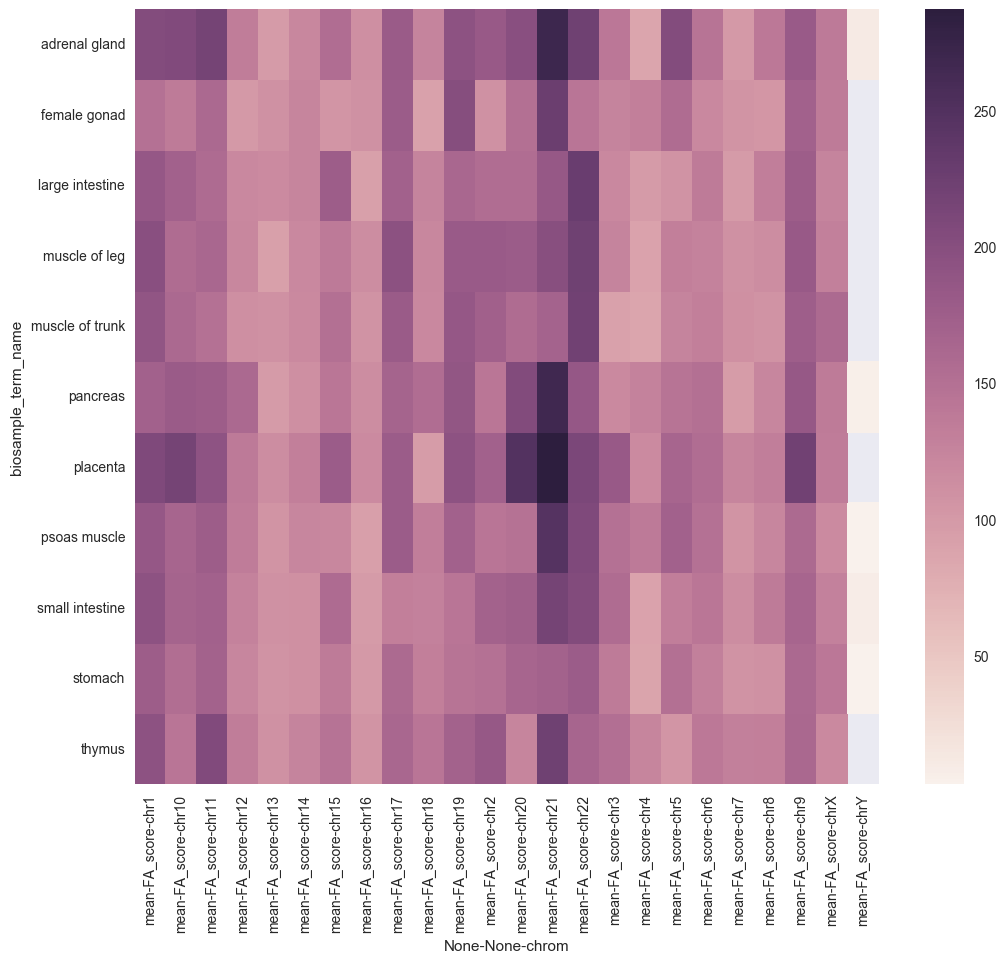

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot, annot=False, linewidths=0, ax=ax)

In [30]:
# try to plot overlap pct vs FA_score
tissues_df = encode_fantom_df_tissue[['size', 'FA_size', 'FA_ovlp_pct', 'biosample_term_name','chrom']]

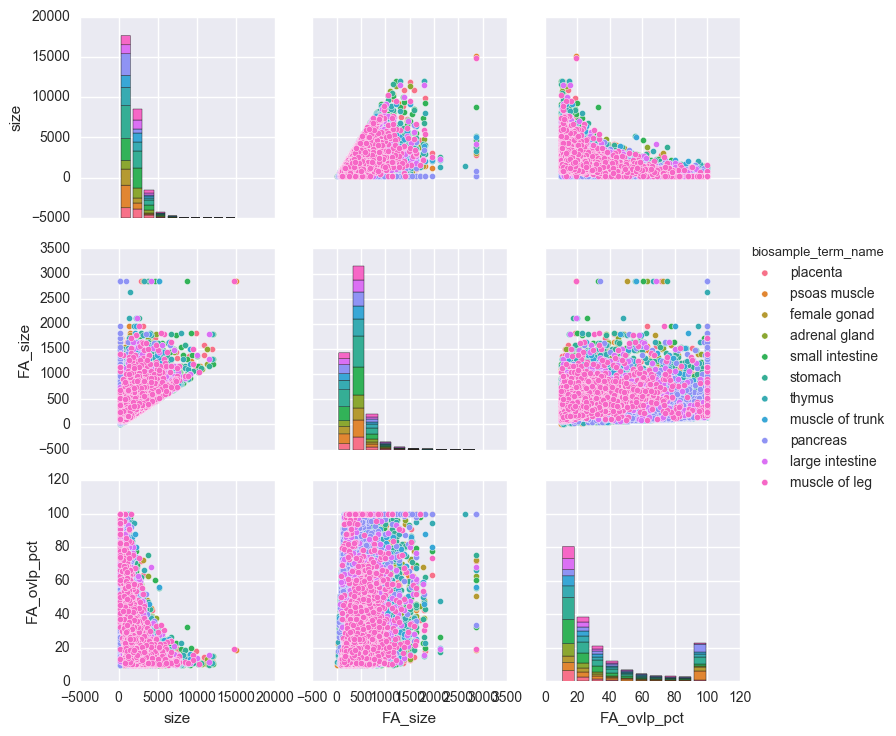

In [31]:
import seaborn as sns
sns.set()

sns.pairplot(tissues_df, hue="biosample_term_name")

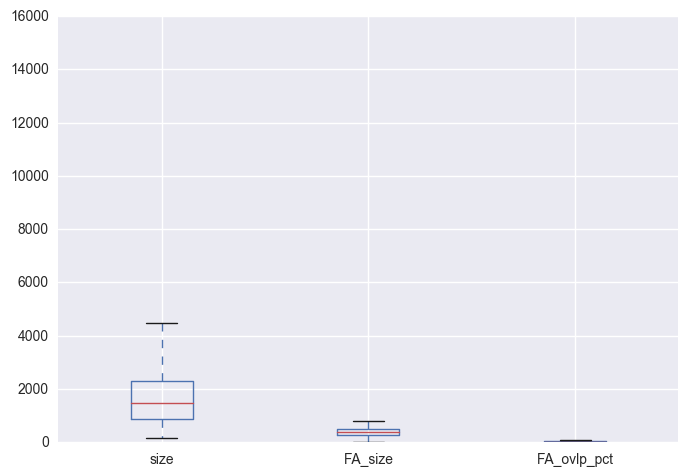

In [32]:
tissues_df.plot.box()

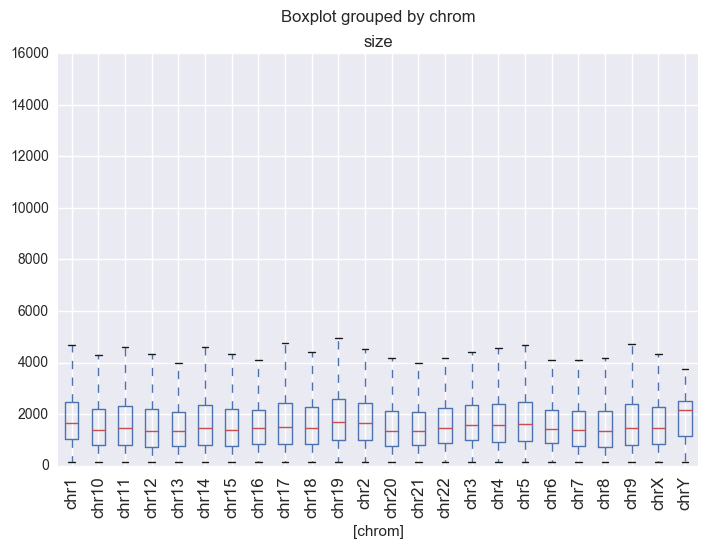

In [34]:
tissues_df[['chrom', 'size']].boxplot(by='chrom', rot=90)

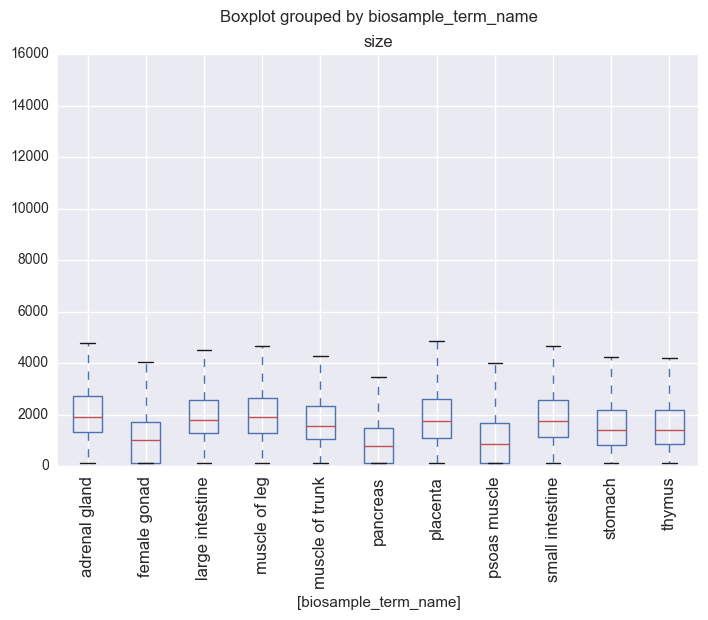

In [36]:
tissues_df[['biosample_term_name', 'size']].boxplot(by='biosample_term_name', rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14e46fcf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x138c9e2e8>]], dtype=object)

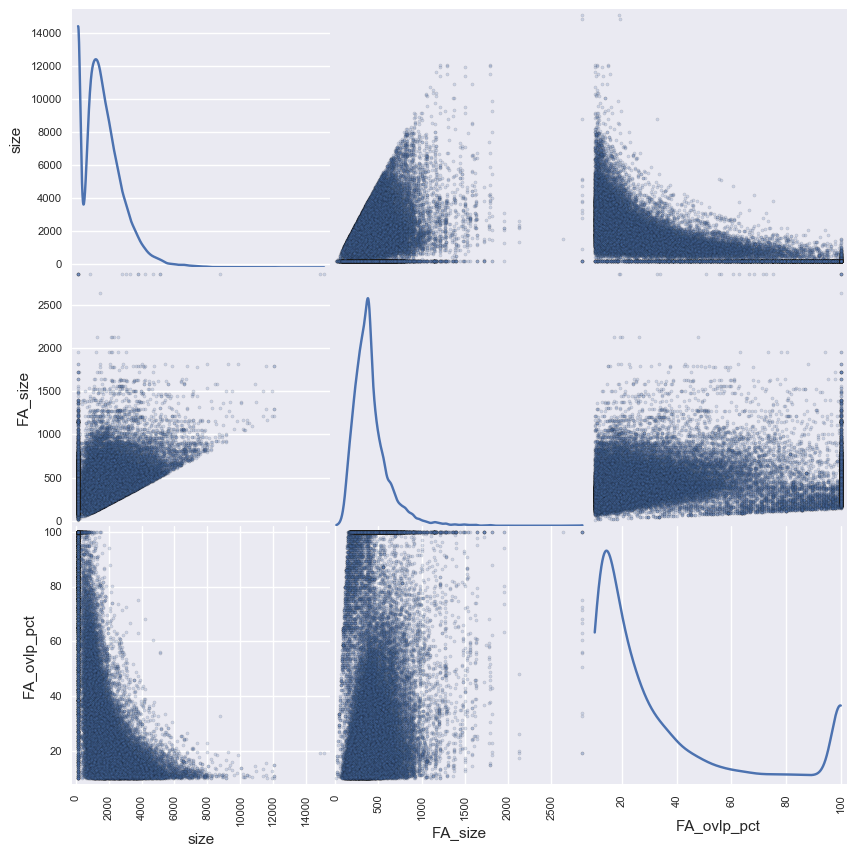

In [15]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(tissues_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

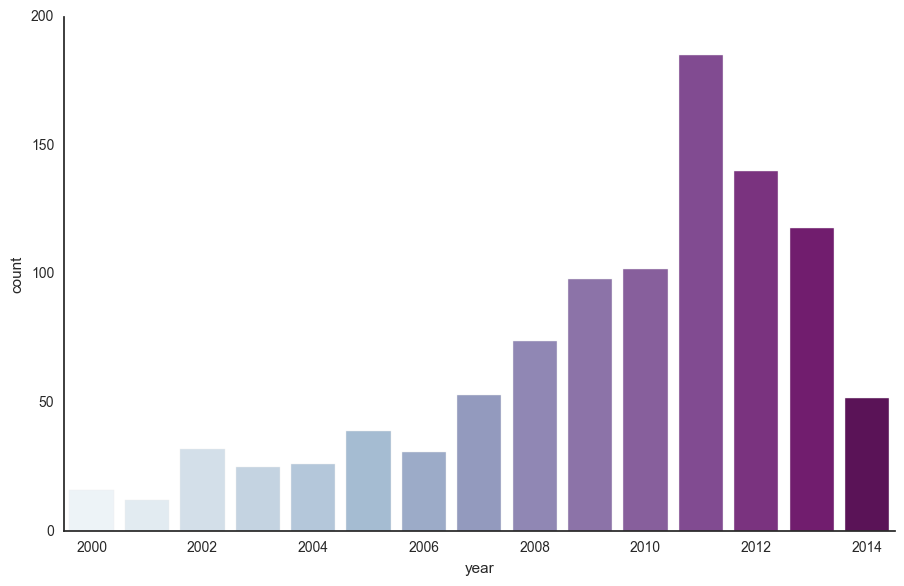

In [39]:
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style="white")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Make a range of years to show categories with no observations
years = np.arange(2000, 2015)

# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2)

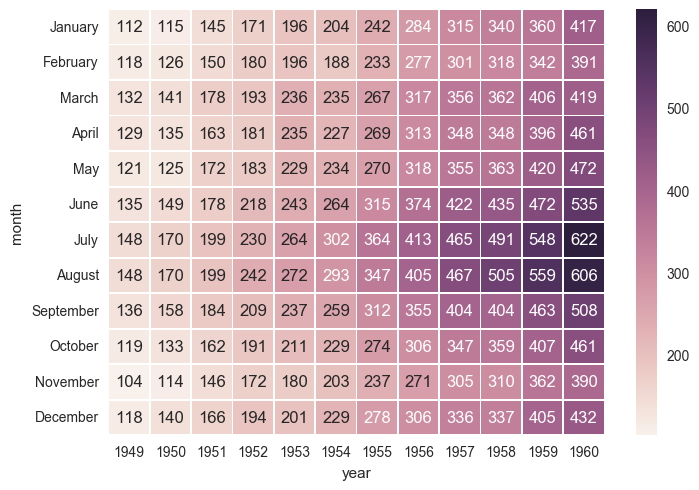

In [40]:
%matplotlib inline
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)

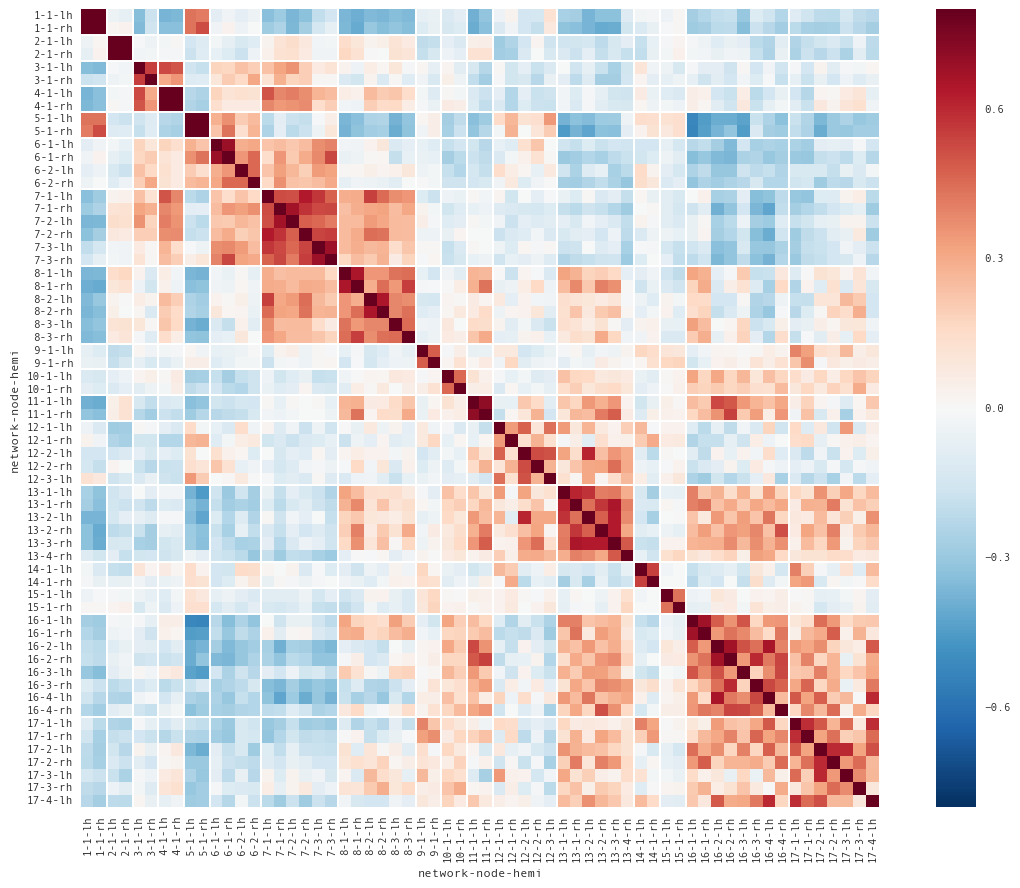

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()